In [1]:
from datetime import datetime
import os
import sys
from pathlib import Path

curr_dir = Path(os.path.split(os.getcwd())[0])

api_dir = str(curr_dir)
if api_dir not in sys.path:
    sys.path.insert(0, api_dir)
    

import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from src.model.classifier import Classifier
from src.datasets.ECG200 import ECG200
from src.model.explainer import explain_samples
from src.model.sample_explainers.gradient_shap import ShapGradientExplainer
from src.dataset_creator import load_dataset, data_array_to_numpy

# Load dataset
dataset from https://www.timeseriesclassification.com/description.php?Dataset=ECG200

In [2]:
train, valid, test = load_dataset(creator=ECG200(),
                                  data_path=Path(api_dir) / "src/datasets/ECG200")

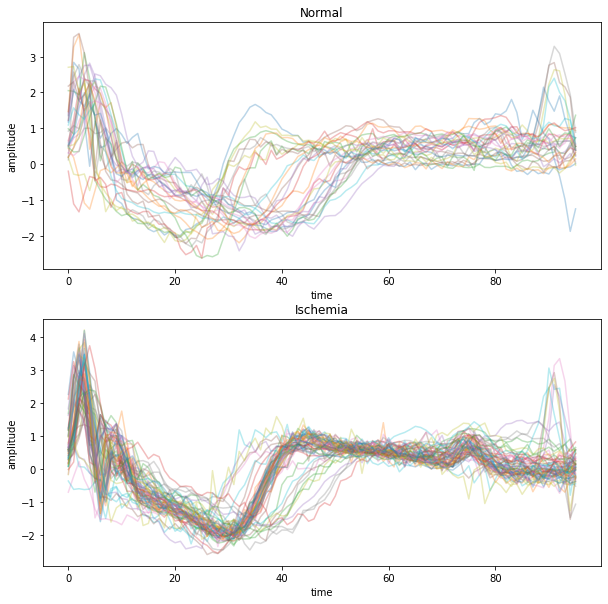

In [3]:
fig, ax = plt.subplots(2,1, figsize=(10,10))
ax[0].plot(train.X[train.y.argmax(axis=1) == 0][:,:,0].T, alpha=0.3)
ax[0].set_title("Normal")
ax[0].set_xlabel("time")
ax[0].set_ylabel("amplitude")
ax[1].plot(train.X[train.y.argmax(axis=1) == 1][:,:,0].T, alpha=0.3)
ax[1].set_title("Ischemia")
ax[1].set_xlabel("time")
ax[1].set_ylabel("amplitude")
plt.show()

# Getting data ready for machine learning
Before the data is sent to the machine learning models we need to convert them from xarray DataArrays into standard numpy arrays. This can be done manually or using the helper function found in the dataset_creator module.

In [4]:
train_numpy, valid_numpy, test_numpy = data_array_to_numpy(train, valid, test)

# Classify heartbeats
To be able to classify the heartbeats a model needs created and to be fitted
## Create model

In [5]:
# Load hyperparameters
hp_file = open(Path(api_dir) / "src/model/default_hyperparameters.json")
hp_dict = json.load(hp_file)

In [6]:
# define and fit classifier
output_dir = Path(api_dir) / "src/output"/ datetime.now().strftime("%Y-%m-%dT%H.%M.%S")
clf = Classifier(input_shape=train_numpy.X.shape, output_directory=output_dir, **hp_dict)

## Fitting model
To fit the model to the training set the `.fit_classifier` method is used.

In [7]:
clf.fit_classifier(train_numpy, test_numpy)

Epoch 1/500
6/6 [==============================] - 2s 325ms/step - loss: 0.7347 - tp: 4.0000 - fp: 6.0000 - tn: 23.0000 - fn: 57.0000 - accuracy: 0.3063 - precision: 0.4000 - recall: 0.0656 - auc: 0.4194 - val_loss: 0.6710 - val_tp: 64.0000 - val_fp: 36.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.6250 - val_precision: 0.6400 - val_recall: 1.0000 - val_auc: 0.7574
Epoch 2/500
6/6 [==============================] - 1s 93ms/step - loss: 0.6910 - tp: 61.0000 - fp: 29.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.6854 - precision: 0.6778 - recall: 1.0000 - auc: 0.6029 - val_loss: 0.6812 - val_tp: 64.0000 - val_fp: 36.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.6250 - val_precision: 0.6400 - val_recall: 1.0000 - val_auc: 0.7559
Epoch 3/500
6/6 [==============================] - 1s 84ms/step - loss: 0.6908 - tp: 61.0000 - fp: 29.0000 - tn: 0.0000e+00 - fn: 0.0000e+00 - accuracy: 0.6604 - precision: 0.6778 - recall: 1.0000 - auc: 0.5582 - val_lo

6/6 [==============================] - 1s 85ms/step - loss: 0.3967 - tp: 53.0000 - fp: 9.0000 - tn: 20.0000 - fn: 8.0000 - accuracy: 0.8104 - precision: 0.8548 - recall: 0.8689 - auc: 0.9062 - val_loss: 0.4910 - val_tp: 52.0000 - val_fp: 10.0000 - val_tn: 26.0000 - val_fn: 12.0000 - val_accuracy: 0.8036 - val_precision: 0.8387 - val_recall: 0.8125 - val_auc: 0.8442
Epoch 23/500
6/6 [==============================] - 1s 94ms/step - loss: 0.3376 - tp: 49.0000 - fp: 3.0000 - tn: 26.0000 - fn: 12.0000 - accuracy: 0.8375 - precision: 0.9423 - recall: 0.8033 - auc: 0.9347 - val_loss: 0.4883 - val_tp: 50.0000 - val_fp: 7.0000 - val_tn: 29.0000 - val_fn: 14.0000 - val_accuracy: 0.8125 - val_precision: 0.8772 - val_recall: 0.7812 - val_auc: 0.8494
Epoch 24/500
6/6 [==============================] - 1s 95ms/step - loss: 0.3233 - tp: 52.0000 - fp: 3.0000 - tn: 26.0000 - fn: 9.0000 - accuracy: 0.8625 - precision: 0.9455 - recall: 0.8525 - auc: 0.9370 - val_loss: 0.4863 - val_tp: 52.0000 - val_fp: 

Epoch 44/500
6/6 [==============================] - 1s 88ms/step - loss: 0.1703 - tp: 55.0000 - fp: 1.0000 - tn: 28.0000 - fn: 6.0000 - accuracy: 0.9208 - precision: 0.9821 - recall: 0.9016 - auc: 0.9853 - val_loss: 0.4794 - val_tp: 56.0000 - val_fp: 10.0000 - val_tn: 26.0000 - val_fn: 8.0000 - val_accuracy: 0.8393 - val_precision: 0.8485 - val_recall: 0.8750 - val_auc: 0.8947
Epoch 45/500
6/6 [==============================] - 0s 78ms/step - loss: 0.1734 - tp: 55.0000 - fp: 2.0000 - tn: 27.0000 - fn: 6.0000 - accuracy: 0.9104 - precision: 0.9649 - recall: 0.9016 - auc: 0.9811 - val_loss: 0.4593 - val_tp: 55.0000 - val_fp: 8.0000 - val_tn: 28.0000 - val_fn: 9.0000 - val_accuracy: 0.8482 - val_precision: 0.8730 - val_recall: 0.8594 - val_auc: 0.9021
Epoch 46/500
6/6 [==============================] - 1s 84ms/step - loss: 0.1995 - tp: 52.0000 - fp: 0.0000e+00 - tn: 29.0000 - fn: 9.0000 - accuracy: 0.9000 - precision: 1.0000 - recall: 0.8525 - auc: 0.9853 - val_loss: 0.4842 - val_tp: 57.0

6/6 [==============================] - 1s 85ms/step - loss: 0.1414 - tp: 54.0000 - fp: 0.0000e+00 - tn: 29.0000 - fn: 7.0000 - accuracy: 0.9146 - precision: 1.0000 - recall: 0.8852 - auc: 0.9972 - val_loss: 0.5766 - val_tp: 59.0000 - val_fp: 13.0000 - val_tn: 23.0000 - val_fn: 5.0000 - val_accuracy: 0.8393 - val_precision: 0.8194 - val_recall: 0.9219 - val_auc: 0.8995
Epoch 66/500
6/6 [==============================] - 1s 85ms/step - loss: 0.1456 - tp: 60.0000 - fp: 3.0000 - tn: 26.0000 - fn: 1.0000 - accuracy: 0.9521 - precision: 0.9524 - recall: 0.9836 - auc: 0.9915 - val_loss: 0.4483 - val_tp: 55.0000 - val_fp: 6.0000 - val_tn: 30.0000 - val_fn: 9.0000 - val_accuracy: 0.8661 - val_precision: 0.9016 - val_recall: 0.8594 - val_auc: 0.9141
Epoch 67/500
6/6 [==============================] - 1s 85ms/step - loss: 0.1120 - tp: 56.0000 - fp: 0.0000e+00 - tn: 29.0000 - fn: 5.0000 - accuracy: 0.9479 - precision: 1.0000 - recall: 0.9180 - auc: 0.9972 - val_loss: 0.5187 - val_tp: 59.0000 - val

6/6 [==============================] - 0s 79ms/step - loss: 0.0502 - tp: 58.0000 - fp: 0.0000e+00 - tn: 29.0000 - fn: 3.0000 - accuracy: 0.9688 - precision: 1.0000 - recall: 0.9508 - auc: 1.0000 - val_loss: 0.6127 - val_tp: 59.0000 - val_fp: 12.0000 - val_tn: 24.0000 - val_fn: 5.0000 - val_accuracy: 0.8482 - val_precision: 0.8310 - val_recall: 0.9219 - val_auc: 0.9117
Epoch 87/500
6/6 [==============================] - 1s 99ms/step - loss: 0.0728 - tp: 60.0000 - fp: 0.0000e+00 - tn: 29.0000 - fn: 1.0000 - accuracy: 0.9896 - precision: 1.0000 - recall: 0.9836 - auc: 0.9977 - val_loss: 0.5318 - val_tp: 54.0000 - val_fp: 4.0000 - val_tn: 32.0000 - val_fn: 10.0000 - val_accuracy: 0.8750 - val_precision: 0.9310 - val_recall: 0.8438 - val_auc: 0.9266
Epoch 88/500
6/6 [==============================] - 1s 102ms/step - loss: 0.0967 - tp: 56.0000 - fp: 0.0000e+00 - tn: 29.0000 - fn: 5.0000 - accuracy: 0.9479 - precision: 1.0000 - recall: 0.9180 - auc: 0.9960 - val_loss: 0.6870 - val_tp: 60.0000

6/6 [==============================] - 1s 100ms/step - loss: 0.0249 - tp: 60.0000 - fp: 0.0000e+00 - tn: 29.0000 - fn: 1.0000 - accuracy: 0.9896 - precision: 1.0000 - recall: 0.9836 - auc: 1.0000 - val_loss: 0.6699 - val_tp: 60.0000 - val_fp: 10.0000 - val_tn: 26.0000 - val_fn: 4.0000 - val_accuracy: 0.8750 - val_precision: 0.8571 - val_recall: 0.9375 - val_auc: 0.9138
Epoch 108/500
6/6 [==============================] - 1s 92ms/step - loss: 0.0179 - tp: 61.0000 - fp: 0.0000e+00 - tn: 29.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - val_loss: 0.6365 - val_tp: 58.0000 - val_fp: 9.0000 - val_tn: 27.0000 - val_fn: 6.0000 - val_accuracy: 0.8661 - val_precision: 0.8657 - val_recall: 0.9062 - val_auc: 0.9099
Epoch 109/500
6/6 [==============================] - 1s 84ms/step - loss: 0.0215 - tp: 61.0000 - fp: 0.0000e+00 - tn: 29.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - val_loss: 0.6211 - val_tp

6/6 [==============================] - 1s 126ms/step - loss: 0.0076 - tp: 61.0000 - fp: 0.0000e+00 - tn: 29.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - val_loss: 0.7051 - val_tp: 58.0000 - val_fp: 9.0000 - val_tn: 27.0000 - val_fn: 6.0000 - val_accuracy: 0.8661 - val_precision: 0.8657 - val_recall: 0.9062 - val_auc: 0.9004
Epoch 129/500
6/6 [==============================] - 1s 101ms/step - loss: 0.0084 - tp: 61.0000 - fp: 0.0000e+00 - tn: 29.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - val_loss: 0.7358 - val_tp: 59.0000 - val_fp: 9.0000 - val_tn: 27.0000 - val_fn: 5.0000 - val_accuracy: 0.8750 - val_precision: 0.8676 - val_recall: 0.9219 - val_auc: 0.9013
Epoch 130/500
6/6 [==============================] - 1s 121ms/step - loss: 0.0075 - tp: 61.0000 - fp: 0.0000e+00 - tn: 29.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - val_loss: 0.7510 - v

6/6 [==============================] - 1s 99ms/step - loss: 0.0041 - tp: 61.0000 - fp: 0.0000e+00 - tn: 29.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - val_loss: 0.8020 - val_tp: 58.0000 - val_fp: 9.0000 - val_tn: 27.0000 - val_fn: 6.0000 - val_accuracy: 0.8661 - val_precision: 0.8657 - val_recall: 0.9062 - val_auc: 0.8980
Epoch 150/500
6/6 [==============================] - 1s 103ms/step - loss: 0.0042 - tp: 61.0000 - fp: 0.0000e+00 - tn: 29.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - val_loss: 0.8629 - val_tp: 60.0000 - val_fp: 12.0000 - val_tn: 24.0000 - val_fn: 4.0000 - val_accuracy: 0.8571 - val_precision: 0.8333 - val_recall: 0.9375 - val_auc: 0.8908
Epoch 151/500
6/6 [==============================] - 1s 126ms/step - loss: 0.0038 - tp: 61.0000 - fp: 0.0000e+00 - tn: 29.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - val_loss: 0.8193 - v

6/6 [==============================] - 0s 83ms/step - loss: 0.0035 - tp: 61.0000 - fp: 0.0000e+00 - tn: 29.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - val_loss: 0.8652 - val_tp: 58.0000 - val_fp: 9.0000 - val_tn: 27.0000 - val_fn: 6.0000 - val_accuracy: 0.8661 - val_precision: 0.8657 - val_recall: 0.9062 - val_auc: 0.8982
Epoch 171/500
6/6 [==============================] - 1s 85ms/step - loss: 0.0028 - tp: 61.0000 - fp: 0.0000e+00 - tn: 29.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - val_loss: 0.9343 - val_tp: 60.0000 - val_fp: 12.0000 - val_tn: 24.0000 - val_fn: 4.0000 - val_accuracy: 0.8571 - val_precision: 0.8333 - val_recall: 0.9375 - val_auc: 0.8882
Epoch 172/500
6/6 [==============================] - 1s 88ms/step - loss: 0.0025 - tp: 61.0000 - fp: 0.0000e+00 - tn: 29.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - val_loss: 0.8835 - val

6/6 [==============================] - 1s 115ms/step - loss: 0.0016 - tp: 61.0000 - fp: 0.0000e+00 - tn: 29.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - val_loss: 0.9228 - val_tp: 58.0000 - val_fp: 9.0000 - val_tn: 27.0000 - val_fn: 6.0000 - val_accuracy: 0.8661 - val_precision: 0.8657 - val_recall: 0.9062 - val_auc: 0.8859
Epoch 192/500
6/6 [==============================] - 1s 95ms/step - loss: 0.0017 - tp: 61.0000 - fp: 0.0000e+00 - tn: 29.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - val_loss: 0.9617 - val_tp: 59.0000 - val_fp: 11.0000 - val_tn: 25.0000 - val_fn: 5.0000 - val_accuracy: 0.8571 - val_precision: 0.8429 - val_recall: 0.9219 - val_auc: 0.8869
Epoch 193/500
6/6 [==============================] - 1s 99ms/step - loss: 0.0016 - tp: 61.0000 - fp: 0.0000e+00 - tn: 29.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - val_loss: 0.9628 - va

6/6 [==============================] - 0s 83ms/step - loss: 0.0011 - tp: 61.0000 - fp: 0.0000e+00 - tn: 29.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - val_loss: 0.9906 - val_tp: 58.0000 - val_fp: 11.0000 - val_tn: 25.0000 - val_fn: 6.0000 - val_accuracy: 0.8482 - val_precision: 0.8406 - val_recall: 0.9062 - val_auc: 0.8869
Epoch 213/500
6/6 [==============================] - 1s 84ms/step - loss: 0.0011 - tp: 61.0000 - fp: 0.0000e+00 - tn: 29.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - val_loss: 1.0091 - val_tp: 59.0000 - val_fp: 11.0000 - val_tn: 25.0000 - val_fn: 5.0000 - val_accuracy: 0.8571 - val_precision: 0.8429 - val_recall: 0.9219 - val_auc: 0.8876
Epoch 214/500
6/6 [==============================] - 1s 98ms/step - loss: 0.0011 - tp: 61.0000 - fp: 0.0000e+00 - tn: 29.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - val_loss: 0.9884 - va

Epoch 233/500
6/6 [==============================] - 1s 86ms/step - loss: 7.8759e-04 - tp: 61.0000 - fp: 0.0000e+00 - tn: 29.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - val_loss: 1.0507 - val_tp: 60.0000 - val_fp: 11.0000 - val_tn: 25.0000 - val_fn: 4.0000 - val_accuracy: 0.8661 - val_precision: 0.8451 - val_recall: 0.9375 - val_auc: 0.8765
Epoch 234/500
6/6 [==============================] - 1s 95ms/step - loss: 7.7600e-04 - tp: 61.0000 - fp: 0.0000e+00 - tn: 29.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - val_loss: 1.0231 - val_tp: 58.0000 - val_fp: 11.0000 - val_tn: 25.0000 - val_fn: 6.0000 - val_accuracy: 0.8482 - val_precision: 0.8406 - val_recall: 0.9062 - val_auc: 0.8887
Epoch 235/500
6/6 [==============================] - 1s 84ms/step - loss: 7.8336e-04 - tp: 61.0000 - fp: 0.0000e+00 - tn: 29.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.00

Epoch 254/500
6/6 [==============================] - 1s 114ms/step - loss: 5.8163e-04 - tp: 61.0000 - fp: 0.0000e+00 - tn: 29.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - val_loss: 1.0762 - val_tp: 58.0000 - val_fp: 11.0000 - val_tn: 25.0000 - val_fn: 6.0000 - val_accuracy: 0.8482 - val_precision: 0.8406 - val_recall: 0.9062 - val_auc: 0.8761
Epoch 255/500
6/6 [==============================] - 1s 107ms/step - loss: 5.6515e-04 - tp: 61.0000 - fp: 0.0000e+00 - tn: 29.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - val_loss: 1.0675 - val_tp: 58.0000 - val_fp: 11.0000 - val_tn: 25.0000 - val_fn: 6.0000 - val_accuracy: 0.8482 - val_precision: 0.8406 - val_recall: 0.9062 - val_auc: 0.8882
Epoch 256/500
6/6 [==============================] - 1s 85ms/step - loss: 6.0452e-04 - tp: 61.0000 - fp: 0.0000e+00 - tn: 29.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.

Epoch 275/500
6/6 [==============================] - 1s 95ms/step - loss: 4.3975e-04 - tp: 61.0000 - fp: 0.0000e+00 - tn: 29.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - val_loss: 1.1167 - val_tp: 59.0000 - val_fp: 11.0000 - val_tn: 25.0000 - val_fn: 5.0000 - val_accuracy: 0.8571 - val_precision: 0.8429 - val_recall: 0.9219 - val_auc: 0.8765
Epoch 276/500
6/6 [==============================] - 1s 85ms/step - loss: 4.5866e-04 - tp: 61.0000 - fp: 0.0000e+00 - tn: 29.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - val_loss: 1.1446 - val_tp: 60.0000 - val_fp: 12.0000 - val_tn: 24.0000 - val_fn: 4.0000 - val_accuracy: 0.8571 - val_precision: 0.8333 - val_recall: 0.9375 - val_auc: 0.8655
Epoch 277/500
6/6 [==============================] - 1s 85ms/step - loss: 4.6159e-04 - tp: 61.0000 - fp: 0.0000e+00 - tn: 29.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.00

Epoch 296/500
6/6 [==============================] - 1s 85ms/step - loss: 3.6894e-04 - tp: 61.0000 - fp: 0.0000e+00 - tn: 29.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - val_loss: 1.1585 - val_tp: 59.0000 - val_fp: 12.0000 - val_tn: 24.0000 - val_fn: 5.0000 - val_accuracy: 0.8482 - val_precision: 0.8310 - val_recall: 0.9219 - val_auc: 0.8659
Epoch 297/500
6/6 [==============================] - 1s 100ms/step - loss: 3.3926e-04 - tp: 61.0000 - fp: 0.0000e+00 - tn: 29.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - val_loss: 1.1375 - val_tp: 59.0000 - val_fp: 11.0000 - val_tn: 25.0000 - val_fn: 5.0000 - val_accuracy: 0.8571 - val_precision: 0.8429 - val_recall: 0.9219 - val_auc: 0.8765
Epoch 298/500
6/6 [==============================] - 0s 83ms/step - loss: 3.8893e-04 - tp: 61.0000 - fp: 0.0000e+00 - tn: 29.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0

Epoch 317/500
6/6 [==============================] - 1s 85ms/step - loss: 2.9584e-04 - tp: 61.0000 - fp: 0.0000e+00 - tn: 29.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - val_loss: 1.1719 - val_tp: 59.0000 - val_fp: 11.0000 - val_tn: 25.0000 - val_fn: 5.0000 - val_accuracy: 0.8571 - val_precision: 0.8429 - val_recall: 0.9219 - val_auc: 0.8644
Epoch 318/500
6/6 [==============================] - 1s 96ms/step - loss: 2.8315e-04 - tp: 61.0000 - fp: 0.0000e+00 - tn: 29.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - val_loss: 1.1537 - val_tp: 58.0000 - val_fp: 11.0000 - val_tn: 25.0000 - val_fn: 6.0000 - val_accuracy: 0.8482 - val_precision: 0.8406 - val_recall: 0.9062 - val_auc: 0.8765
Epoch 319/500
6/6 [==============================] - 1s 92ms/step - loss: 2.7993e-04 - tp: 61.0000 - fp: 0.0000e+00 - tn: 29.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.00

Epoch 338/500
6/6 [==============================] - 1s 95ms/step - loss: 2.2694e-04 - tp: 61.0000 - fp: 0.0000e+00 - tn: 29.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - val_loss: 1.2054 - val_tp: 59.0000 - val_fp: 11.0000 - val_tn: 25.0000 - val_fn: 5.0000 - val_accuracy: 0.8571 - val_precision: 0.8429 - val_recall: 0.9219 - val_auc: 0.8659
Epoch 339/500
6/6 [==============================] - 1s 88ms/step - loss: 2.2813e-04 - tp: 61.0000 - fp: 0.0000e+00 - tn: 29.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - val_loss: 1.1984 - val_tp: 59.0000 - val_fp: 11.0000 - val_tn: 25.0000 - val_fn: 5.0000 - val_accuracy: 0.8571 - val_precision: 0.8429 - val_recall: 0.9219 - val_auc: 0.8644
Epoch 340/500
6/6 [==============================] - 1s 102ms/step - loss: 2.2341e-04 - tp: 61.0000 - fp: 0.0000e+00 - tn: 29.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0

Epoch 359/500
6/6 [==============================] - 1s 94ms/step - loss: 1.8658e-04 - tp: 61.0000 - fp: 0.0000e+00 - tn: 29.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - val_loss: 1.2351 - val_tp: 59.0000 - val_fp: 11.0000 - val_tn: 25.0000 - val_fn: 5.0000 - val_accuracy: 0.8571 - val_precision: 0.8429 - val_recall: 0.9219 - val_auc: 0.8659
Epoch 360/500
6/6 [==============================] - 0s 67ms/step - loss: 1.8417e-04 - tp: 61.0000 - fp: 0.0000e+00 - tn: 29.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - val_loss: 1.2309 - val_tp: 59.0000 - val_fp: 11.0000 - val_tn: 25.0000 - val_fn: 5.0000 - val_accuracy: 0.8571 - val_precision: 0.8429 - val_recall: 0.9219 - val_auc: 0.8659
Epoch 361/500
6/6 [==============================] - 1s 94ms/step - loss: 1.8279e-04 - tp: 61.0000 - fp: 0.0000e+00 - tn: 29.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.00

Epoch 380/500
6/6 [==============================] - 1s 94ms/step - loss: 1.5910e-04 - tp: 61.0000 - fp: 0.0000e+00 - tn: 29.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - val_loss: 1.2669 - val_tp: 59.0000 - val_fp: 12.0000 - val_tn: 24.0000 - val_fn: 5.0000 - val_accuracy: 0.8482 - val_precision: 0.8310 - val_recall: 0.9219 - val_auc: 0.8659
Epoch 381/500
6/6 [==============================] - 0s 72ms/step - loss: 1.5687e-04 - tp: 61.0000 - fp: 0.0000e+00 - tn: 29.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - val_loss: 1.2467 - val_tp: 59.0000 - val_fp: 11.0000 - val_tn: 25.0000 - val_fn: 5.0000 - val_accuracy: 0.8571 - val_precision: 0.8429 - val_recall: 0.9219 - val_auc: 0.8659
Epoch 382/500
6/6 [==============================] - 0s 70ms/step - loss: 1.5662e-04 - tp: 61.0000 - fp: 0.0000e+00 - tn: 29.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.00

Epoch 401/500
6/6 [==============================] - 1s 111ms/step - loss: 1.3099e-04 - tp: 61.0000 - fp: 0.0000e+00 - tn: 29.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - val_loss: 1.2763 - val_tp: 59.0000 - val_fp: 11.0000 - val_tn: 25.0000 - val_fn: 5.0000 - val_accuracy: 0.8571 - val_precision: 0.8429 - val_recall: 0.9219 - val_auc: 0.8659
Epoch 402/500
6/6 [==============================] - 1s 89ms/step - loss: 1.3019e-04 - tp: 61.0000 - fp: 0.0000e+00 - tn: 29.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - val_loss: 1.2757 - val_tp: 59.0000 - val_fp: 11.0000 - val_tn: 25.0000 - val_fn: 5.0000 - val_accuracy: 0.8571 - val_precision: 0.8429 - val_recall: 0.9219 - val_auc: 0.8659
Epoch 403/500
6/6 [==============================] - 1s 91ms/step - loss: 1.3053e-04 - tp: 61.0000 - fp: 0.0000e+00 - tn: 29.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0

Epoch 422/500
6/6 [==============================] - 1s 86ms/step - loss: 1.2101e-04 - tp: 61.0000 - fp: 0.0000e+00 - tn: 29.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - val_loss: 1.2758 - val_tp: 59.0000 - val_fp: 11.0000 - val_tn: 25.0000 - val_fn: 5.0000 - val_accuracy: 0.8571 - val_precision: 0.8429 - val_recall: 0.9219 - val_auc: 0.8663
Epoch 423/500
6/6 [==============================] - 1s 86ms/step - loss: 1.2198e-04 - tp: 61.0000 - fp: 0.0000e+00 - tn: 29.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - val_loss: 1.2836 - val_tp: 59.0000 - val_fp: 11.0000 - val_tn: 25.0000 - val_fn: 5.0000 - val_accuracy: 0.8571 - val_precision: 0.8429 - val_recall: 0.9219 - val_auc: 0.8659
Epoch 424/500
6/6 [==============================] - 1s 86ms/step - loss: 1.2247e-04 - tp: 61.0000 - fp: 0.0000e+00 - tn: 29.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.00

Epoch 443/500
6/6 [==============================] - 1s 112ms/step - loss: 1.1073e-04 - tp: 61.0000 - fp: 0.0000e+00 - tn: 29.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - val_loss: 1.2984 - val_tp: 59.0000 - val_fp: 11.0000 - val_tn: 25.0000 - val_fn: 5.0000 - val_accuracy: 0.8571 - val_precision: 0.8429 - val_recall: 0.9219 - val_auc: 0.8659
Epoch 444/500
6/6 [==============================] - 1s 93ms/step - loss: 1.0984e-04 - tp: 61.0000 - fp: 0.0000e+00 - tn: 29.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - val_loss: 1.2826 - val_tp: 59.0000 - val_fp: 11.0000 - val_tn: 25.0000 - val_fn: 5.0000 - val_accuracy: 0.8571 - val_precision: 0.8429 - val_recall: 0.9219 - val_auc: 0.8663
Epoch 445/500
6/6 [==============================] - 1s 85ms/step - loss: 1.1205e-04 - tp: 61.0000 - fp: 0.0000e+00 - tn: 29.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0

Epoch 464/500
6/6 [==============================] - 1s 96ms/step - loss: 1.0039e-04 - tp: 61.0000 - fp: 0.0000e+00 - tn: 29.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - val_loss: 1.3051 - val_tp: 59.0000 - val_fp: 11.0000 - val_tn: 25.0000 - val_fn: 5.0000 - val_accuracy: 0.8571 - val_precision: 0.8429 - val_recall: 0.9219 - val_auc: 0.8663
Epoch 465/500
6/6 [==============================] - 1s 124ms/step - loss: 1.0016e-04 - tp: 61.0000 - fp: 0.0000e+00 - tn: 29.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - val_loss: 1.3037 - val_tp: 59.0000 - val_fp: 11.0000 - val_tn: 25.0000 - val_fn: 5.0000 - val_accuracy: 0.8571 - val_precision: 0.8429 - val_recall: 0.9219 - val_auc: 0.8663
Epoch 466/500
6/6 [==============================] - 1s 89ms/step - loss: 1.0071e-04 - tp: 61.0000 - fp: 0.0000e+00 - tn: 29.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0

Epoch 485/500
6/6 [==============================] - 1s 87ms/step - loss: 9.2137e-05 - tp: 61.0000 - fp: 0.0000e+00 - tn: 29.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - val_loss: 1.3133 - val_tp: 59.0000 - val_fp: 11.0000 - val_tn: 25.0000 - val_fn: 5.0000 - val_accuracy: 0.8571 - val_precision: 0.8429 - val_recall: 0.9219 - val_auc: 0.8663
Epoch 486/500
6/6 [==============================] - 1s 98ms/step - loss: 9.1666e-05 - tp: 61.0000 - fp: 0.0000e+00 - tn: 29.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.0000 - val_loss: 1.3167 - val_tp: 59.0000 - val_fp: 11.0000 - val_tn: 25.0000 - val_fn: 5.0000 - val_accuracy: 0.8571 - val_precision: 0.8429 - val_recall: 0.9219 - val_auc: 0.8663
Epoch 487/500
6/6 [==============================] - 1s 93ms/step - loss: 9.1547e-05 - tp: 61.0000 - fp: 0.0000e+00 - tn: 29.0000 - fn: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - auc: 1.00

## Classification and evaluation
After training the network its possible to use the model on new data.
To apply the model on some data the `model.predict` method is used.
It is also possible to evaluate model performance using `model.evaluate`.

In [8]:
# make classification
y_pred = clf.model.predict(x=test_numpy.X)

In [10]:
# eval classifier
results = clf.model.evaluate(x=test_numpy.X, y=test_numpy.y, return_dict=True, batch_size=len(test_numpy.X))
pd.DataFrame.from_dict(results, orient='index').T

1/1 [==============================] - 0s 2ms/step - loss: 1.3237 - tp: 59.0000 - fp: 11.0000 - tn: 25.0000 - fn: 5.0000 - accuracy: 0.8400 - precision: 0.8429 - recall: 0.9219 - auc: 0.8663


,loss,tp,fp,tn,fn,accuracy,precision,recall,auc
0,1.323689,59.0,11.0,25.0,5.0,0.84,0.842857,0.921875,0.866319


# Explain classification
It might also be of interest, to get insight on what the network based its classification on.
Here we can use an explainer such as the SHAP gradient explainer.

In [ ]:
is_correct_classification = (y_pred.argmax(axis=1) == test_numpy.y.argmax(axis=1))
ex_classification = explain_samples(explainer=ShapGradientExplainer(),
                                    model=clf.model,
                                    X_reference=train_numpy.X,
                                    X_to_explain=test_numpy.X[is_correct_classification, :, :])

Using TensorFlow backend.


Instructions for updating:
Simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


## Visualization of explanations
In order to present the sample explanation we can make a plot of the signal with a coloured overlay.
The overlay color is determined by the shap value.

In [ ]:
def plot_importance(X_to_explain, y_pred, explanation):
    cmap = mpl.colors.LinearSegmentedColormap.from_list('shap', [mpl.cm.cool(0), (1, 1, 1, 1), mpl.cm.cool(256)],N=256)
    
    fig, ax = plt.subplots(figsize=(7,5))  
    ax.plot(X_to_explain[(y_pred.argmax(axis=1) == 0), :, :].mean(axis=0), linewidth=3, c="b")
    ax.plot(X_to_explain[(y_pred.argmax(axis=1) == 1), :, :].mean(axis=0), linewidth=3, c="r")
    
    extent = [0, len(X_to_explain[0]), ax.get_ylim()[0], ax.get_ylim()[1]]
    im1 = ax.imshow(explanation[0].mean(axis=0).T, cmap=cmap, aspect="auto", alpha=0.8, extent=extent)  
    cbar1 = fig.colorbar(im1, ax=ax)
    cbar1.set_label("SHAP values (relative)")

    ax.set_xlabel("samples")
    ax.set_xlabel("amplitude")
    ax.set_title("Explanations of Classifications")
    ax.legend(["Mean normal","Mean ischemia"])

In [ ]:
plot_importance(X_to_explain = test_numpy.X, y_pred = y_pred, explanation = ex_classification)